In [2]:
# 1. Классификатор на основе критерия Байеса: Наивный Байес
# Концепция: Классификатор Наивный Байес использует теорему Байеса для вычисления вероятности каждого класса,
# предполагая независимость признаков (наивное предположение). Класс с наибольшей вероятностью назначается как результат классификации.

# Шаги реализации:
# 1. Импортируем GaussianNB из sklearn.naive_bayes.
# 2. Обучаем модель на тренировочных данных.
# 3. Выполняем предсказание и оцениваем результаты.


In [3]:
# Импортируем необходимые библиотеки
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [4]:
# Загрузка данных
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Обучение модели
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

In [6]:
# Оценка
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Точность:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
Точность: 0.9777777777777777


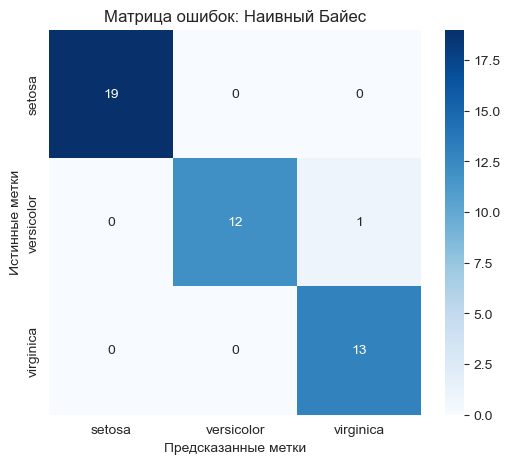

In [7]:
# Визуализация: Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=load_iris().target_names,
            yticklabels=load_iris().target_names)
plt.title("Матрица ошибок: Наивный Байес")
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.show()

In [8]:
# 2. Классификатор на основе функций: Метод опорных векторов (SVM)
# Концепция: Метод опорных векторов (SVM) строит гиперплоскость, разделяющую данные на разные классы, 
# оптимизируя разделительную границу между классами и минимизируя ошибки классификации.

# Шаги реализации:
# 1. Импортируем SVC из sklearn.svm.
# 2. Обучаем модель с помощью тренировочных данных.
# 3. Выполняем предсказание и оцениваем результаты.


In [9]:
from sklearn.svm import SVC
import numpy as np

# Используем только первые два признака для визуализации
X_2D = X[:, :2]
X_train, X_test, y_train, y_test = train_test_split(X_2D, y, test_size=0.3, random_state=42)

In [10]:
# Обучение модели
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [11]:
# Оценка
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Точность:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.70      0.54      0.61        13
           2       0.62      0.77      0.69        13

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.81      0.80      0.80        45

[[19  0  0]
 [ 0  7  6]
 [ 0  3 10]]
Точность: 0.8


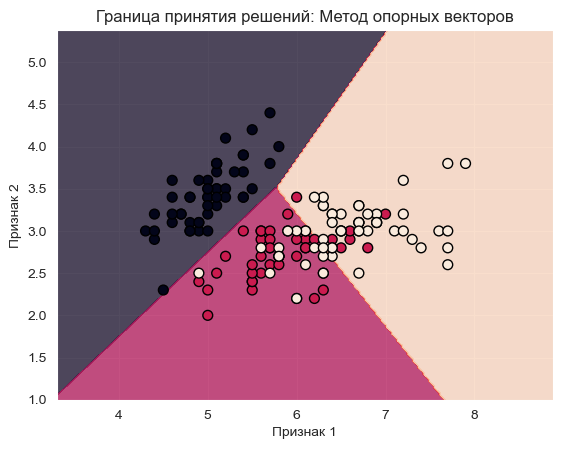

In [12]:
# Визуализация: Граница принятия решений
h = .02  # шаг для сетки
x_min, x_max = X_2D[:, 0].min() - 1, X_2D[:, 0].max() + 1
y_min, y_max = X_2D[:, 1].min() - 1, X_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.75)
plt.scatter(X_2D[:, 0], X_2D[:, 1], c=y, edgecolors='k', marker='o', s=50)
plt.title("Граница принятия решений: Метод опорных векторов")
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()

In [13]:
# 3. Классификатор на основе правил принятия решений: Дерево решений
# Концепция: Классификаторы на основе дерева решений используют правила «если-то» для разбиения набора данных на подмножества.
# Дерево представляет собой иерархическую структуру, в которой каждый узел соответствует признаку, а листья - классам.

# Шаги реализации:
# 1. Импортируем DecisionTreeClassifier из sklearn.tree.
# 2. Обучаем модель на тренировочных данных.
# 3. Выполняем предсказание и оцениваем результаты.


In [14]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Обучение модели
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

In [15]:
# Оценка
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Точность:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.43      0.46      0.44        13
           2       0.46      0.46      0.46        13

    accuracy                           0.67        45
   macro avg       0.63      0.62      0.63        45
weighted avg       0.68      0.67      0.67        45

[[18  1  0]
 [ 0  6  7]
 [ 0  7  6]]
Точность: 0.6666666666666666


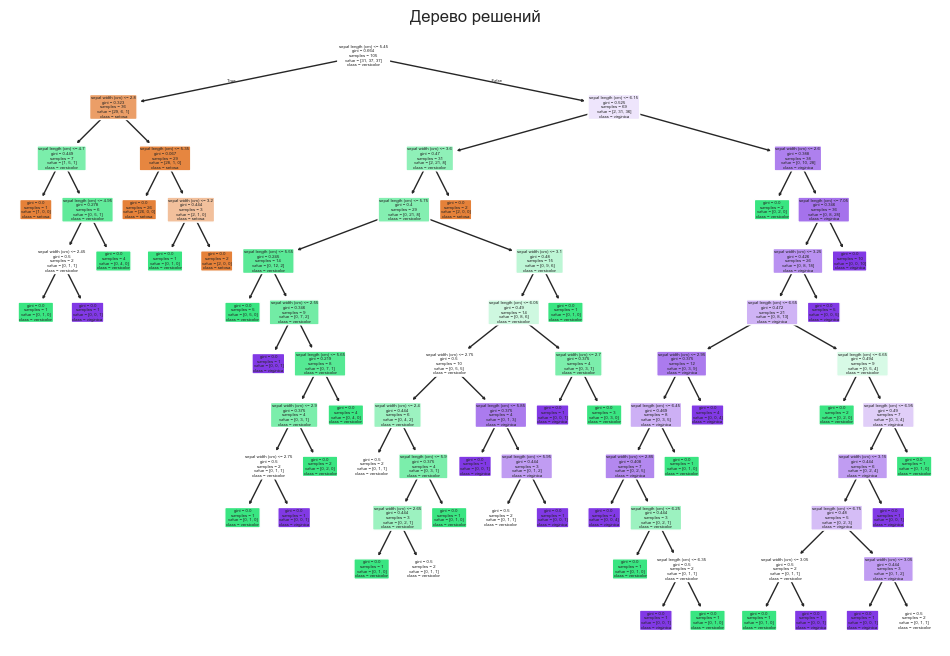

In [16]:
# Визуализация: Дерево решений
plt.figure(figsize=(12, 8))
plot_tree(dt_model, filled=True, feature_names=load_iris().feature_names, class_names=load_iris().target_names,
          rounded=True)
plt.title("Дерево решений")
plt.show()

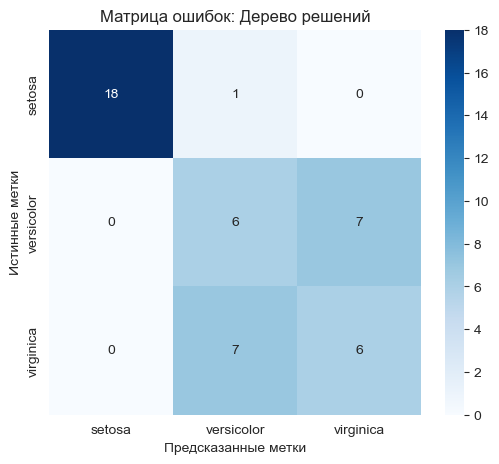

In [17]:
# Визуализация: Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=load_iris().target_names,
            yticklabels=load_iris().target_names)
plt.title("Матрица ошибок: Дерево решений")
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.show()
